In [5]:
# !pip3 install -U scikit-image
!pip3 list | grep scikit

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
intel-scikit-learn (0.19.2)
scikit-image (0.15.0)
scikit-learn (0.19.2)


In [20]:
# https://scikit-image.org/docs/0.15.x/auto_examples/filters/plot_denoise_wavelet.html#sphx-glr-auto-examples-filters-plot-denoise-wavelet-py

In [13]:
import matplotlib.pyplot as plt

from skimage.restoration import (denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.measure import compare_psnr, compare_ssim

original = img_as_float(data.chelsea()[100:250, 50:300])
print(original.shape)
print(original)

(150, 250, 3)
[[[0.6        0.44705882 0.3254902 ]
  [0.58431373 0.43137255 0.30980392]
  [0.56078431 0.4        0.29019608]
  ...
  [0.68235294 0.5372549  0.42352941]
  [0.70588235 0.56470588 0.43921569]
  [0.70980392 0.56862745 0.44313725]]

 [[0.57647059 0.43529412 0.30980392]
  [0.56470588 0.42352941 0.29803922]
  [0.56470588 0.41176471 0.29803922]
  ...
  [0.68235294 0.54509804 0.43529412]
  [0.67843137 0.53333333 0.41960784]
  [0.72156863 0.57647059 0.4627451 ]]

 [[0.56862745 0.41568627 0.28627451]
  [0.56862745 0.41568627 0.28627451]
  [0.57647059 0.42352941 0.30196078]
  ...
  [0.67843137 0.5372549  0.43529412]
  [0.6627451  0.51764706 0.40392157]
  [0.70980392 0.56470588 0.45098039]]

 ...

 [[0.68235294 0.55686275 0.50588235]
  [0.68627451 0.56078431 0.50980392]
  [0.68235294 0.55686275 0.50588235]
  ...
  [0.65882353 0.49803922 0.37254902]
  [0.65882353 0.49019608 0.35294118]
  [0.65098039 0.47843137 0.33333333]]

 [[0.6745098  0.56078431 0.50588235]
  [0.67058824 0.5529411

In [19]:
sigma = 0.12
noisy = random_noise(original, var=sigma**2)

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print("Estimated Gaussian noise standard deviation = {}".format(sigma_est))

im_bayes = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                           method='BayesShrink', mode='soft')
im_visushrink = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                method='VisuShrink', mode='soft',
                                sigma=sigma_est)

# VisuShrink is designed to eliminate noise with high probability, but this
# results in a visually over-smooth appearance.  Repeat, specifying a reduction
# in the threshold by factors of 2 and 4.
im_visushrink2 = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/2)
im_visushrink4 = denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/4)

# Compute PSNR as an indication of image quality
psnr_noisy = compare_psnr(original, noisy)
ssim_noisy = compare_ssim(original, noisy, multichannel=True)
psnr_bayes = compare_psnr(original, im_bayes)
ssim_bayes = compare_ssim(original, im_bayes, multichannel=True)
psnr_visushrink = compare_psnr(original, im_visushrink)
psnr_visushrink2 = compare_psnr(original, im_visushrink2)
psnr_visushrink4 = compare_psnr(original, im_visushrink4)

Estimated Gaussian noise standard deviation = 0.11805075070634403


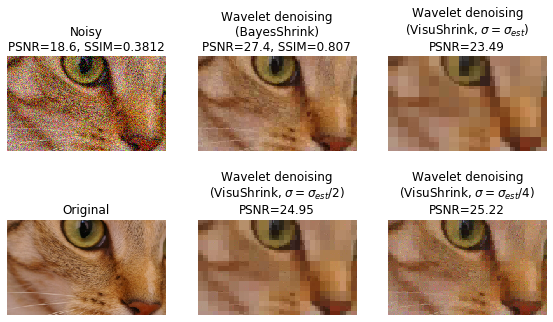

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy\nPSNR={:0.4g}, SSIM={:0.4g}'.format(psnr_noisy, ssim_noisy))
ax[0, 1].imshow(im_bayes)
ax[0, 1].axis('off')
ax[0, 1].set_title(
    'Wavelet denoising\n(BayesShrink)\nPSNR={:0.4g}, SSIM={:0.4g}'.format(psnr_bayes, ssim_bayes))
ax[0, 2].imshow(im_visushrink)
ax[0, 2].axis('off')
ax[0, 2].set_title(
    ('Wavelet denoising\n(VisuShrink, $\sigma=\sigma_{est}$)\n'
     'PSNR=%0.4g' % psnr_visushrink))
ax[1, 0].imshow(original)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')
ax[1, 1].imshow(im_visushrink2)
ax[1, 1].axis('off')
ax[1, 1].set_title(
    ('Wavelet denoising\n(VisuShrink, $\sigma=\sigma_{est}/2$)\n'
     'PSNR=%0.4g' % psnr_visushrink2))
ax[1, 2].imshow(im_visushrink4)
ax[1, 2].axis('off')
ax[1, 2].set_title(
    ('Wavelet denoising\n(VisuShrink, $\sigma=\sigma_{est}/4$)\n'
     'PSNR=%0.4g' % psnr_visushrink4))
fig.tight_layout()

plt.show()


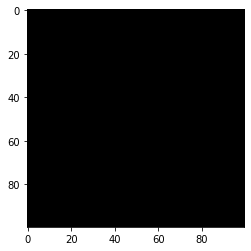

In [4]:
import numpy as np
tmp = np.zeros((100,100,3))
plt.imshow(tmp)

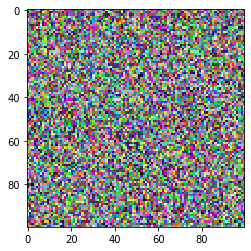

In [5]:
import numpy as np
tmp = np.random.rand(100,100,3)
plt.imshow(tmp)

In [6]:
tmp.shape

(100, 100, 3)

In [7]:
training_data = np.transpose(tmp, (2, 0, 1))

In [8]:
training_data.shape

(3, 100, 100)

In [9]:
tmp

array([[[0.11561023, 0.76426064, 0.05941123],
        [0.22218791, 0.9769693 , 0.08253899],
        [0.22287757, 0.21590862, 0.72572257],
        ...,
        [0.51881531, 0.86380476, 0.28725255],
        [0.6348587 , 0.53175505, 0.91133172],
        [0.95070636, 0.02083241, 0.42436211]],

       [[0.04239697, 0.01626988, 0.03428748],
        [0.68930864, 0.56215976, 0.89832204],
        [0.97911556, 0.23696572, 0.880489  ],
        ...,
        [0.21175299, 0.59884345, 0.77049441],
        [0.66637483, 0.65387119, 0.05522478],
        [0.8767612 , 0.31760549, 0.2993588 ]],

       [[0.26955611, 0.65469679, 0.49551842],
        [0.73375189, 0.12254015, 0.39334656],
        [0.28543168, 0.00621462, 0.95405869],
        ...,
        [0.86100429, 0.20053733, 0.49348322],
        [0.60584029, 0.12321983, 0.84553375],
        [0.8052496 , 0.11760117, 0.249046  ]],

       ...,

       [[0.13706718, 0.20834518, 0.45696549],
        [0.89287368, 0.04339483, 0.17054207],
        [0.63019657, 0

In [10]:
training_data

array([[[0.11561023, 0.22218791, 0.22287757, ..., 0.51881531,
         0.6348587 , 0.95070636],
        [0.04239697, 0.68930864, 0.97911556, ..., 0.21175299,
         0.66637483, 0.8767612 ],
        [0.26955611, 0.73375189, 0.28543168, ..., 0.86100429,
         0.60584029, 0.8052496 ],
        ...,
        [0.13706718, 0.89287368, 0.63019657, ..., 0.26631123,
         0.50938061, 0.81841557],
        [0.26093205, 0.92883389, 0.0868663 , ..., 0.29514209,
         0.28858566, 0.54656733],
        [0.82510169, 0.81535796, 0.56684968, ..., 0.02596412,
         0.15944405, 0.47299627]],

       [[0.76426064, 0.9769693 , 0.21590862, ..., 0.86380476,
         0.53175505, 0.02083241],
        [0.01626988, 0.56215976, 0.23696572, ..., 0.59884345,
         0.65387119, 0.31760549],
        [0.65469679, 0.12254015, 0.00621462, ..., 0.20053733,
         0.12321983, 0.11760117],
        ...,
        [0.20834518, 0.04339483, 0.47335108, ..., 0.76028295,
         0.28412846, 0.31458216],
        [0.9

In [11]:
import torch

In [12]:
# numpy.clip(a, a_min, a_max, out=None, **kwargs)[source]
import numpy as np
print(np.clip(training_data, 0.2, 0.5))

[[[0.2        0.22218791 0.22287757 ... 0.5        0.5        0.5       ]
  [0.2        0.5        0.5        ... 0.21175299 0.5        0.5       ]
  [0.26955611 0.5        0.28543168 ... 0.5        0.5        0.5       ]
  ...
  [0.2        0.5        0.5        ... 0.26631123 0.5        0.5       ]
  [0.26093205 0.5        0.2        ... 0.29514209 0.28858566 0.5       ]
  [0.5        0.5        0.5        ... 0.2        0.2        0.47299627]]

 [[0.5        0.5        0.21590862 ... 0.5        0.5        0.2       ]
  [0.2        0.5        0.23696572 ... 0.5        0.5        0.31760549]
  [0.5        0.2        0.2        ... 0.20053733 0.2        0.2       ]
  ...
  [0.20834518 0.2        0.47335108 ... 0.5        0.28412846 0.31458216]
  [0.5        0.2        0.2        ... 0.2        0.5        0.5       ]
  [0.2061395  0.5        0.5        ... 0.24966815 0.5        0.5       ]]

 [[0.2        0.2        0.5        ... 0.28725255 0.5        0.42436211]
  [0.2        0.5     